# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [90]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression


# Load data

In [91]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

You can see details and metadata here, including the meaning of features:
https://scikit-learn.org/stable/datasets/index.html#wine-dataset

In [92]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.031792,2.332642,2.367170,19.701887,98.556604,2.282170,1.981509,0.375755,1.620849,5.150472,0.951321,2.617830,756.915094
std,0.821117,1.126702,0.271797,3.159023,13.749514,0.573592,1.013492,0.124869,0.592705,2.443026,0.216509,0.680315,326.825135
min,11.460000,0.890000,1.700000,12.000000,70.000000,1.250000,0.470000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.632500,2.210000,17.500000,88.000000,1.800000,1.017500,0.270000,1.252500,3.180000,0.802500,1.972500,510.000000
50%,13.135000,1.845000,2.350000,19.500000,97.000000,2.210000,2.035000,0.360000,1.545000,4.800000,0.960000,2.795000,675.000000
75%,13.677500,3.135000,2.580000,21.575000,105.750000,2.787500,2.855000,0.477500,1.970000,6.200000,1.097500,3.167500,1023.750000
max,14.830000,5.650000,3.230000,28.500000,151.000000,3.380000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


Statement: if you perform PCA and maintain all of the principal components, no data is discarded and you did not perform dimensionality reduction.

Q1: Do you agree? Explain your answer

#### Answer:
If all principal components are maintained, the data will remain of the same dimension, hence no reduction has been performed. The transformed data set will contain a summative variance which is equal to the summative variance of the original features, in that sense, no data is discarded. In another sense, all features have undergone transformation, so data regarding the original features is lost, but can be retreived using an inverse transform. 

# PCA + Random forest

Task 1: Use X_train, y_train to train a random forest with the deafult parameters. You can read more about the algorithm in SKlearn's documentation.
Evaulate the algorithm using accuracy score and X_test, y_test.

In [93]:
import numpy as np
np.random.seed(42)

In [94]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions)}')

Accuracy: 0.9861111111111112


Task 2: Now do the same, but use PCA.

You are asked to use the **maximal number** of componenets for PCA.
Print the accuracy of Random forest + PCA.

Remeber, you should center and scale your data before you apply PCA.

In [95]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(StandardScaler(), PCA(), RandomForestClassifier())
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions)}')

Accuracy: 0.9444444444444444


Q2: By applying PCA, did random forest's results improved\stayed the same\got worse? 

#### Answer:
In this case, it seems that after applying PCA, the accuracy of the Random Forest model got worse.

# PCA + logistic regression

Task 3: repeat task 1 with logistic regression.


In [96]:
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions)}')

Accuracy: 0.9444444444444444



Task 4: repeast task 2 with logistic regression.

In [97]:
pipeline = make_pipeline(StandardScaler(), PCA(), LogisticRegression(max_iter=10000))
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions)}')

Accuracy: 0.9861111111111112


*Q3*: By applying PCA, Did linear regression results improved\stayed the same\got worse?

#### Answer:
In this case, it seems that after applying PCA, the accuracy of the Logistic regression model improved.

Q4: Explain the differences between answers to Q2 and Q3. 

#### Answer:
Running PCA without dimensionality reduction on the input seemed to decrease performance for a random forest model but increase performance for a logistic regression model.  
One explanation for this difference can be that in case of a dataset that contains dependant variables, only the first few principle components will explain most of the variance while the rest of the components don't contribute to the variance and will usually not help in splitting the data. In the random forest model, each tree chooses a subset of features to split the data on, and in our case there is a fair chance that this subset doesn't contain any of the meaningful features. Since many trees don't contain meaningful features, their predictions will also be poor, and when aggregating the predictions, their accuracy will slightly fall.  
In the logistic regression model this isn't a problem since there is no element of random choice of the features, and un-meaningful features will just receive very low coefficient values.

Finding the optimal number of compoenets:

You team decided that you must compress the data and PCA was selected. However, you are not sure how many principals components to have. Implemented the following techniques (should work without human intervention):

1. Keeping at least 50% of the variance with minimum number of components
2. Keeping above average components only
3. The number of componets which maximize the accuracy of Linear regression on the test set. Components which improve the accuracy by less than 0.001 are not considered as contributing



In [98]:
def pca_1(pipeline, full_pca):
    cum_explained_var = pipeline['pca'].explained_variance_ratio_.cumsum()
    first_over_50 = np.where(cum_explained_var > 0.5)[0][0]
    return full_pca[:,:first_over_50 + 1]

def pca_2(pipeline, full_pca):
    explained_var = pipeline['pca'].explained_variance_ratio_
    chosen_components = np.where(explained_var > explained_var.mean())[0]
    return full_pca[:,chosen_components]

def pca_3(pipeline, full_pca, X_test, y_test):   
    models, accuracies = [],[]
    for i in range(full_pca.shape[1]):
        clf = LogisticRegression(max_iter=10000)
        clf.fit(full_pca[:,:i+1], y_train)
        test_pca = pipeline.transform(X_test)[:,:i+1]
        predictions = clf.predict(test_pca)
        acc = accuracy_score(y_test, predictions)
        accuracies.append(acc)
    
    best_num_features = np.argmax(np.array(accuracies))
    return full_pca[:,:best_num_features+1]



pipeline = make_pipeline(StandardScaler(), PCA())
full_pca = pipeline.fit_transform(X_train)

reduced_1 = pca_1(pipeline, full_pca)
reduced_2 = pca_2(pipeline, full_pca)
reduced_3 = pca_3(pipeline, full_pca, X_test, y_test)

print(f'The optimal number of features according to method 1: {reduced_1.shape[1]}')
print(f'The optimal number of features according to method 2: {reduced_2.shape[1]}')
print(f'The optimal number of features according to method 3: {reduced_3.shape[1]}')

The optimal number of features according to method 1: 2
The optimal number of features according to method 2: 3
The optimal number of features according to method 3: 7


# Eigenfaces

The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. Wikipedia: https://en.wikipedia.org/wiki/Eigenface

The following code illustrates what each eigenface stands for. Follow the code and the comments:

Total dataset size:
n_samples: 1288
n_features: 1850
Extracting the top 150 eigenfaces from 1288 faces


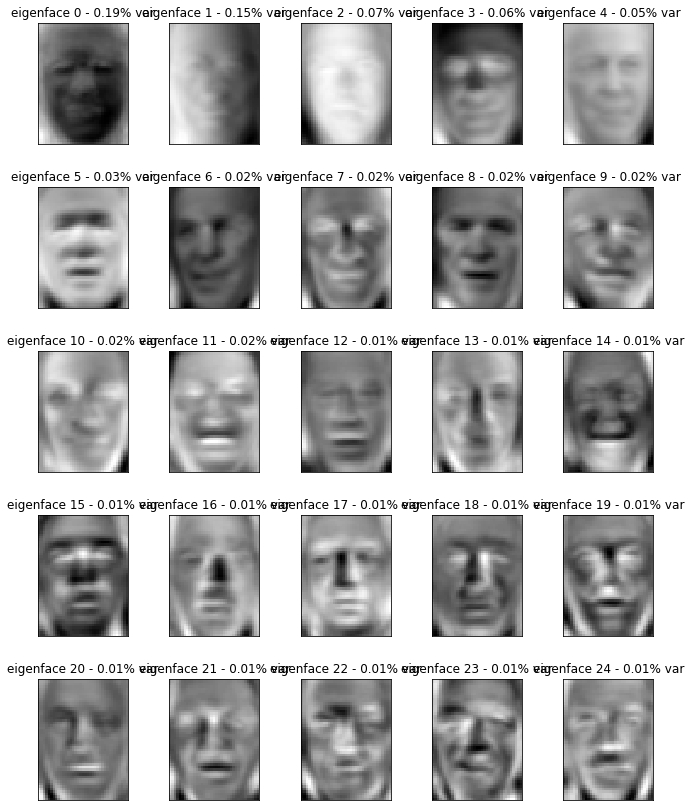

In [99]:
from time import time
import logging
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.svm import SVC


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)



# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)

eigenfaces = pca.components_.reshape((n_components, h, w))

# Helper function
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

#############################################################################
# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface {} - {:3.2f}% var".format(i, pca.explained_variance_ratio_[i]) for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=5, n_col=5)

Task 5: Plot the reconstruction of an image with different number of principal components used (1 to 30 components). However, for effiency, you are not allowed to refit the PCA object.

The resulting plot will allow us to understand the contribution of each principal component.
Check the result for different images

<Figure size 1440x720 with 0 Axes>

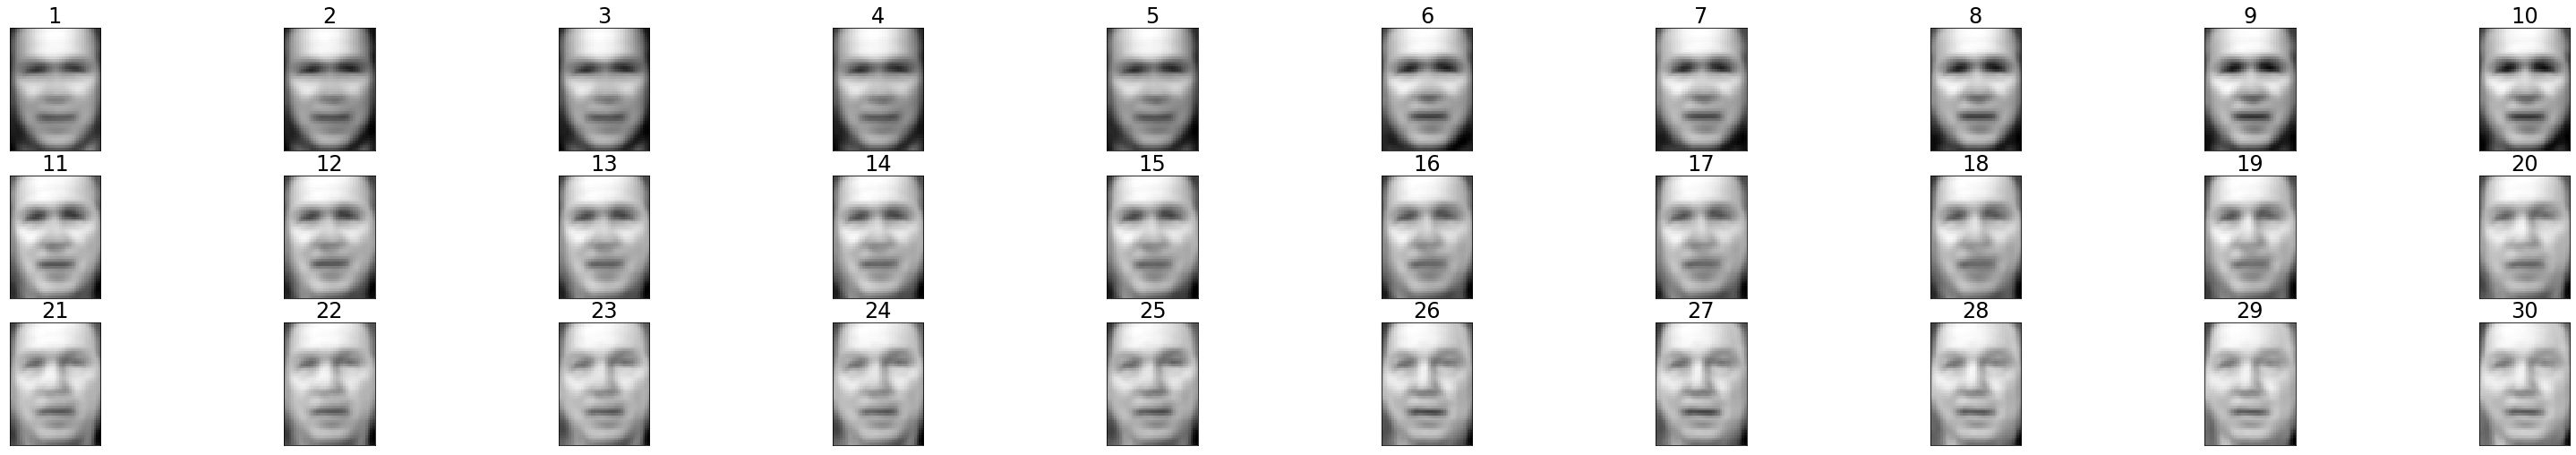

In [100]:
# For a specific image, see how adding PCs affect the reconstruction
pic = X[300] # choose any arbitrary image
numPCs = 30

plt.figure(figsize=(20,10))
plt.figure(figsize=(1.8 * numPCs, 2.4 * 25))
for i in range(1, numPCs+1):
    
  ### Take the first i principal components
    components = pca.components_[:i,:]
    explained_var = pca.explained_variance_[:i]
  ### Reduce the dimensionality of the image
    reduced = ((pic - pca.mean_) @ components.T) / np.sqrt(explained_var)
  ### Reconstruct the image to the original dimension
    reconstructed = (reduced.reshape(1,i) @ (np.sqrt(explained_var).reshape(i,1)*components)) + pca.mean_
  ### Plot the image
    plt.subplot(20, 10, i)
    plt.imshow(reconstructed.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(f'{i}', size=24)
    plt.xticks(())
    plt.yticks(())
  # You are not allowed to refit the pca object
  # Hint: take a look at sklearn's PCA transform and inverse_transform implementation
  
plt.show()